In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from torchview import draw_graph

from nlp_assemblee.models import build_classifier_from_config

In [2]:
classifier = build_classifier_from_config("../configs/TSP_C_256-M-L_BN_D_128_128.json")

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializin

In [15]:
batch_size = 4
example_input = {
    "intervention": {
        "input_ids": torch.ones([batch_size, 512], dtype=torch.int),
        "attention_mask": torch.ones([batch_size, 512], dtype=torch.int),
    },
    "title": {
        "input_ids": torch.ones([batch_size, 64], dtype=torch.int),
        "attention_mask": torch.ones([batch_size, 64], dtype=torch.int),
    },
    "profession": {
        "input_ids": torch.ones([batch_size, 16], dtype=torch.int),
        "attention_mask": torch.ones([batch_size, 16], dtype=torch.int),
    },
}

In [22]:
classifier.eval()
with torch.no_grad():
    pred = classifier(**example_input)
pred.shape

torch.Size([4, 3])

In [24]:
%matplotlib inline

In [29]:
model_graph = draw_graph(classifier, input_data=example_input, expand_nested=True, device="cpu")

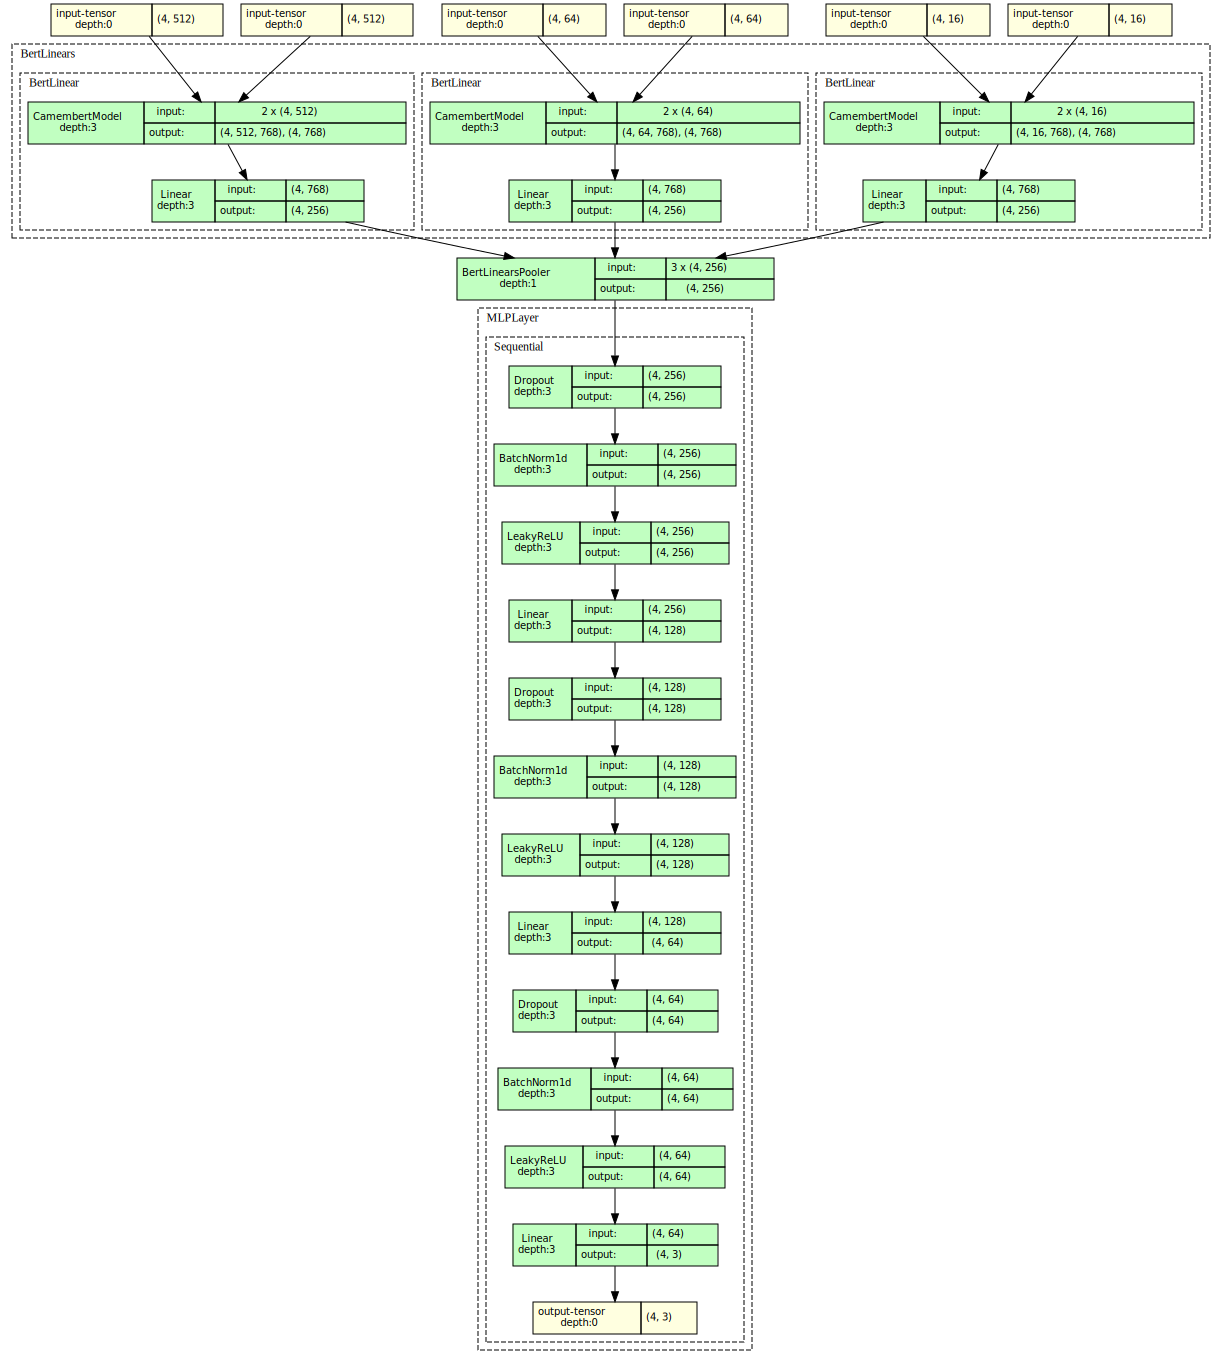

In [30]:
model_graph.visual_graph